# * clusterpy requires python2 *

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import pysal.contrib.clusterpy as cp
import pysal as ps
from pysal.weights import Queen, KNN


import matplotlib.pyplot as plt
#%matplotlib inline

ClusterPy: Library of spatially constrained clustering algorithms


## Data prep

In [2]:
attrs = pd.read_csv('data/la_data.csv')
attrs.set_index('geoid', inplace=True)
shp = gpd.GeoDataFrame.from_file('data/la_msa.shp') # need to reinitialize as Geodataframe

In [3]:
# make sure geo and attribute data are in same order to avoide linking weights by ID
attrs.sort_index(inplace=True)
shp.set_index('GEOID', inplace=True)
shp.sort_index(inplace=True)

In [4]:
shp.head()

,geometry
GEOID,
06037101110,POLYGON ((-118.2979312137039 34.26322687612055...
06037101122,POLYGON ((-118.2774342104291 34.25990787645111...
06037101210,POLYGON ((-118.2859362111909 34.25589987630816...
06037101220,POLYGON ((-118.2849922110132 34.25589387633028...
06037101300,POLYGON ((-118.2652762074589 34.25238487698516...


In [17]:
attrs.head()

,pct_bachelor_or_greater,pct_white,pct_black,pct_hispanic,pct_asian,pct_minority,median_household_income,median_home_value
geoid,,,,,,,,
6037101110,0.219321,0.556799,0.014519,0.337065,0.084603,0.443201,0.161688,0.182312
6037101122,0.307796,0.752355,0.005149,0.123974,0.106005,0.247645,0.400201,0.253920
6037101210,0.187990,0.417035,0.037836,0.487759,0.016538,0.582965,0.114613,0.154875
6037101220,0.224474,0.538939,0.023357,0.259132,0.156818,0.461061,0.121456,0.181005
6037101300,0.351540,0.788662,0.009991,0.103855,0.099898,0.211338,0.288696,0.228493




`attrs` contains several important tract-level demographic variables from the LTDB database (constructed from https://github.com/knaaptime/tstracts). Currently the data are a timeseries in long-form, so each tract is represented in the dataset 5 times: once each for for 1980, 1990, 2000, 2010, and 2015. Ignoring the temporal dimension for now, we'll use only the 2015 data for a subset of the attributes: race, income, education, and housing price

In [6]:
W = Queen.from_dataframe(shp)
K = KNN.from_dataframe(shp, k=5)

In [7]:
fo = ps.open('data/la.gal', 'w')
fo.write(W)
fo.close()

fo = ps.open('data/la_k.gal', 'w')
fo.write(K)
fo.close()

In [30]:
K.pct_nonzero

0.17946877243359655

## Clusterpy Algorithms

In [8]:
layer = cp.Layer()


In [9]:
cp.addArray2Layer(attrs.values, layer, names=attrs.columns.tolist())

Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done
Adding variables
Done


In [10]:
cp.addQueen2Layer('data/la.gal', layer)

In [ ]:
layer.cluster('maxpTabu', attrs, 20, wType='queen')

Getting variables
Variables successfully extracted
Running max-p-regions model (Duque, Anselin and Rey, 2010)
Local search method: Tabu Search
Number of areas:  2786
threshold value:  20
Disconnected areas neighs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,

In [ ]:
layer.cluster('som', attrs, wType='queen')

In [22]:
shp['som'] = layer.region2areas
shp['som'].head(50)

GEOID
06037101110     0
06037101122    30
06037101210    23
06037101220     0
06037101300    30
06037101400    10
06037102103    30
06037102104    30
06037102105    15
06037102107    11
06037103101    10
06037103102     0
06037103200     1
06037103300    40
06037103400    10
06037104103    48
06037104105    27
06037104108    38
06037104124     3
06037104201    39
06037104203    18
06037104204    26
06037104310    19
06037104320    18
06037104401     8
06037104403     8
06037104404     8
06037104500     9
06037104610     9
06037104620     9
06037104701    29
06037104703    19
06037104704    38
06037104810     8
06037104821     7
06037104822     7
06037106010     5
06037106020     6
06037106111     4
06037106112     5
06037106113     5
06037106114    17
06037106403     7
06037106405    16
06037106406     4
06037106407    25
06037106408    18
06037106510     4
06037106520     7
06037106603    73
Name: som, dtype: int64

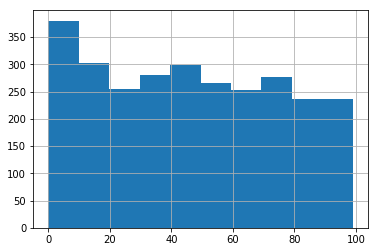

In [23]:
shp.som.hist()

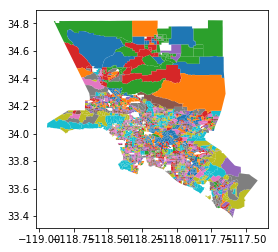

In [24]:
shp.plot(column='som', categorical=True)

In [42]:
import pysal as ps